In [82]:
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import numpy as np
frame = pd.read_csv('Data.csv', sep='[; ]+', engine='python')
mels = np.genfromtxt('Data.csv', dtype={'names':('Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'), 'formats':('U8', 'U8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8')}, delimiter=';')
mels = np.delete(data, (0), axis=0)


In [83]:
y_f= []
y_m = []
for i in range(1, 7):
    i = 10 ** i
    frame1 = frame[0:i]
    stmt = 'frame1[frame1.Global_active_power > 5]'
    y_f.append(timeit.timeit(stmt = stmt, globals=globals(), number = 1))
    mels1 = mels[0:i]
    stmt1 = "mels1[mels1['Global_active_power'] > 5]"
    y_m.append(timeit.timeit(stmt = stmt1, globals=globals(), number = 1))

([<matplotlib.axis.XTick at 0x218b1c21288>,
 <a list of 6 Text xticklabel objects>)

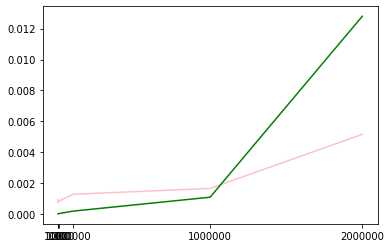

In [84]:
x = [100, 1000, 10000,100000,1000000, 2000000]
plt.plot(x, y_f, color = 'pink') 
x = [100, 1000, 10000,100000,1000000, 2000000]
plt.plot(x, y_m, color = 'green')
plt.xticks(x)

In [85]:
y_f = []
y_m = []
for i in range(1, 7):
    i = 10 ** i
    frame1 = frame[0:i]
    stmt = 'frame1[frame1.Voltage > 235]'
    y_f.append(timeit.timeit(stmt = stmt, globals=globals(), number = 1))
    mels1 = mels[0:i]
    stmt1 = "mels1[mels1['Voltage'] > 235]"
    y_m.append(timeit.timeit(stmt = stmt1, globals=globals(), number = 1))

([<matplotlib.axis.XTick at 0x218b61cbc88>,
 <a list of 6 Text xticklabel objects>)

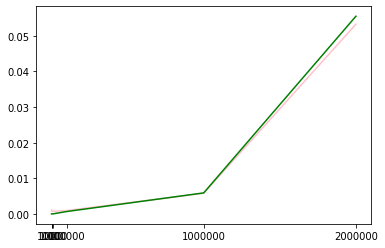

In [86]:
x_f = [100, 1000, 10000,100000,1000000, 2000000]
plt.plot(x_f, y_f, color = 'pink') 
x_m = [100, 1000, 10000,100000,1000000, 2000000]
plt.plot(x_m, y_m, color = 'green')
plt.xticks(x)

In [87]:
y_f = []
y_m = []
for i in range(1, 7):
    i = 10 ** i
    frame1 = frame[0:i]
    stmt = "frame1[(frame1['Global_intensity'] >=19) & (frame1['Global_intensity'] <= 20) & (frame1['Sub_metering_2'] > frame1['Sub_metering_3'])]"
    y_f.append(timeit.timeit(stmt = stmt, globals=globals(), number = 1))
    mels1 = mels1[0:i]
    stmt1 = "(mels1['Global_intensity']>= 19) & (mels1['Global_intensity'] <= 20) & (mels1['Sub_metering_2'] > mels1['Sub_metering_3'])"
    y_m.append(timeit.timeit(stmt = stmt1, globals=globals(), number = 1))

([<matplotlib.axis.XTick at 0x21881135748>,
 <a list of 6 Text xticklabel objects>)

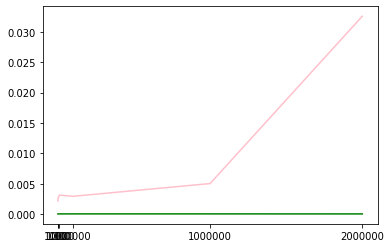

In [88]:
x_f = [100, 1000, 10000,100000,1000000, 2000000]
plt.plot(x_f, y_f, color = 'pink') 
x_m = [100, 1000, 10000,100000,1000000, 2000000]
plt.plot(x_m, y_m, color = 'green')
plt.xticks(x)

In [100]:

frame1 =frame.sample(n=500000)
mels0 = frame1.to_records()

In [102]:
y_f = []
y_m = []
for i in range(1, 7):
    i = 10 ** i
    frame2 = frame1[0:i]
    stmt = '''frame2['Sub_metering_1'].mean()
frame2['Sub_metering_2'].mean()
frame2['Sub_metering_3'].mean()'''
    y_f.append(timeit.timeit(stmt = stmt, globals=globals(), number = 1))
    mels2 = mels0[0:i]
    stmt1 = '''
mels2['Sub_metering_1'].mean()
mels2['Sub_metering_2'].mean()
mels2['Sub_metering_3'].mean()'''
    y_m.append(timeit.timeit(stmt = stmt1, globals=globals(), number = 1))

([<matplotlib.axis.XTick at 0x2188eb5cac8>,
 <a list of 6 Text xticklabel objects>)

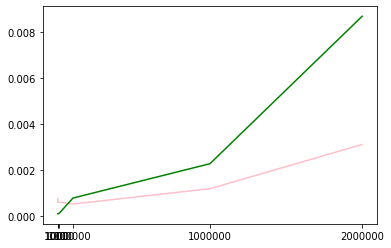

In [103]:
x_f = [100, 1000, 10000,100000,1000000, 2000000]
plt.plot(x_f, y_f, color = 'pink') 
x_m = [100, 1000, 10000,100000,1000000, 2000000]
plt.plot(x_m, y_m, color = 'green')
plt.xticks(x)

In [107]:
y_f = []
y_m = []
for i in range(1, 7):
    i = 10 ** i
    frame1 = frame[0:i]
    stmt1 = '''frame2 = frame1[(frame1.index <= 100) & (frame1.Time >= '18:00:00') & (frame1.Global_active_power > 6) & (frame1.Sub_metering_2 > frame1.Sub_metering_1) & (frame1.Sub_metering_2 > frame1.Sub_metering_3)]
frame2 = frame2.reset_index(drop=True)
frame2_1 = frame2[(frame2.index < len(frame2)//2) & (frame2.index % 3 == 0)]
frame2_2 = frame2[(frame2.index >= len(frame2)//2) & (frame2.index % 4 == 0)]'''
    y_f.append(timeit.timeit(stmt = stmt1, globals=globals(), number = 1))
    mels1 = mels[0:i]
    stmt1 = '''mels2 = mels1[(mels1['Time'] >= '18:00:00') & (mels1['Global_active_power'] > 6) & (mels1['Sub_metering_2'] > mels1['Sub_metering_1']) & (mels1['Sub_metering_2'] > mels1['Sub_metering_3'])]
mels2[0:len(mels2)//2:3]
mels2[len(mels2)//2+1::4]'''
    y_m.append(timeit.timeit(stmt = stmt1, globals=globals(), number = 1))

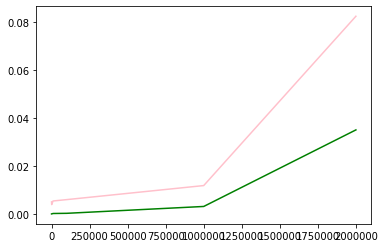

In [108]:
x_f = [100, 1000, 10000,100000,1000000, 2000000]
plt.plot(x_f, y_f, color = 'pink') 
x_m = [100, 1000, 10000,100000,1000000, 2000000]
plt.plot(x_m, y_m, color = 'green')
#plt.xticks(x)